# Investigating Wine Data

## 1. Gather data

### **1.1.** Problem Statement
I would like to look at wine data to see what parameters go into wines with high ratings. I would like to first see where in the world has the highest rated wines. I want to see if there is a best place for wine. I also would like to see if higher prices result in higher ratings. If so, I want to know when I start to see diminishing returns on my money. I will be wrangling different datasets that have data on the wines, where they are from, ratings, price, etc. to answer these questions. One dataset comes from WineEnthusiest wine reviews, one comes from data that someone scraped from Vivino, and the other comes from an api available online.

#### **Dataset 1**

Type: csv file

Method: The data was gathered by downloading the csv files from the following website:
https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting?select=winemag-data-130k-v2.csv

https://www.kaggle.com/datasets/budnyak/wine-rating-and-price

red_winedf and white_wine_df Dataset variables:

* **Name**: Name of the wine
* **country**:  Country where the wine is from
* **Region**: Region where the wine is from
* **Winery**: Winery where the wine was made
* **Rating**: Average rating of the wine
* **NumberOfRatings**: Number of ratings the wine got
* **Price**: Price of the wine
* **Year**: Year the wine was made

big_wine_df Dataset variables:

* **id**: identification number to keep track of wines
* **country**: Country where the wine is from
* **description**: Description of the wine
* **designation**: What kind of wine it is
* **points**: Rating of the wine out of 100
* **price**: Price of the wine
* **province**: Province where the wine is from
* **region_1**: First region where the wine is from
* **region_2**: Second region where the wine is from
* **taster_name**: Name of the person who tasted and rated the wine
* **taster_twitter_handle**: Twitter handle of the person who tasted and rated the wine
* **title**: Name of the wine
* **variety**: Variety of the wine
* **winery**: What winery the wine was made at

In [1]:
#Imports
import pandas as pd
import numpy as np
import requests 
import json
from bs4 import BeautifulSoup

In [3]:
#Download data manually about red wine and white wine
red_wine_df = pd.read_csv('Red.csv')
white_wine_df = pd.read_csv('White.csv')
big_wine_df = pd.read_csv('winemag-data-130k-v2.csv')

#### Dataset 2

Type: API

Method: The data was gathered using the API method from the folowing website: https://sampleapis.com/api-list/wines

red_wine_api and white_wine_api Dataset variables:

* **winery**: The winery the wine was made at
* **wine**: Name of the wine
* **rating**: Rating of the wine, includes average rating and number of ratings
* **location**: Location of where the wine was made, includes country and region
* **image**: Link to an image of the wine
* **id**: Identification number to keep track of the wines

In [5]:

#FILL IN 2nd data gathering and loading method

#urls
url_red = 'https://api.sampleapis.com/wines/reds'
url_white = 'https://api.sampleapis.com/wines/whites'

#send a request to get the data from the url
red_wine_api = requests.get(url_red)
white_wine_api = requests.get(url_white)

#If request fails, raise an error
red_wine_api.raise_for_status()
white_wine_api.raise_for_status()

#Convert to json format
red_wine_api_text = red_wine_api.json()
white_wine_api_text = white_wine_api.json()

#Convert to pandas dataframe
red_wine_api_df = pd.DataFrame(red_wine_api_text)
white_wine_api_df = pd.DataFrame(white_wine_api_text)

Save your raw dataset files to the local data store before moving to the next step.

In [6]:
# Store the raw data in your local data store
red_wine_raw = red_wine_df.copy()
white_wine_raw = white_wine_df.copy()
big_wine_raw = big_wine_df.copy()
red_wine_api_raw = red_wine_api_df.copy()
white_wine_api_raw = white_wine_api_df.copy()

## 2. Assess data

In [7]:
# Take a look at all the dataframes

In [7]:
red_wine_df.sample(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
5603,Tìros Limited Edition 2015,Italy,Colli del Limbara,Siddura,4.2,46,34.90,2015
4493,Lalande-de-Pomerol 2014,France,Lalande-de-Pomerol,Château Les Vieux Ormes,3.8,355,20.90,2014
514,Negroamaro Salento Maru 2018,Italy,Salento,Castello Monaci,3.5,115,7.40,2018
1411,Ars In Vitro 2012,Spain,Navarra,Bodega Tandem,3.5,152,8.49,2012
1093,Melck's Blended Red 2015,South Africa,Stellenbosch,Muratie,3.7,138,9.05,2015


In [8]:
white_wine_df.sample(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
3535,Côtes du Rhône Réserve Blanc 2016,France,Côtes-du-Rhône,Les Dauphins,3.5,531,6.85,2016
2826,Sauvignon Blanc (Statue de Femme) 2018,South Africa,Franschhoek,Franschhoek Cellar,3.7,175,6.95,2018
2390,Sauvignon 2019,Italy,Südtirol - Alto Adige,Cantina Bolzano / Kellerei Bozen,3.8,117,9.90,2019
2892,Chardonnay 2016,United States,Columbia Valley,Columbia Winery,3.6,189,14.62,2016
1374,Geheimrat J Riesling Spätlese Trocken 2011,Germany,Rheingau,Weingüter Wegeler,4.2,56,24.90,2011


In [9]:
big_wine_df.sample(5)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
59487,59487,Argentina,Wiry herbal aromas of blueberry and currant le...,Ampakama,84,11.0,Other,San Juan,NaN,Michael Schachner,@wineschach,Casa Montes 2014 Ampakama Syrah (San Juan),Syrah,Casa Montes
16511,16511,Argentina,"Big, full, ripe and black as night, this may b...",Apartado Gran,93,100.0,Other,Argentina,NaN,Michael Schachner,@wineschach,Rutini 2013 Apartado Gran Malbec (Argentina),Malbec,Rutini
49376,49376,US,"Hearty and rustic, this is a blend of several ...",Red Splash,83,10.0,California,Sonoma County,Sonoma,NaN,NaN,St. Francis 2007 Red Splash Red (Sonoma County),Red Blend,St. Francis
92172,92172,Australia,"Though a bit timid on the nose, this example i...",NaN,87,18.0,Victoria,Yarra Valley,NaN,NaN,NaN,Yering Station 2006 Shiraz-Viognier (Yarra Val...,Shiraz-Viognier,Yering Station
36107,36107,US,"This tasty, well-built wine is light in color,...",Estate Bottled,89,28.0,California,El Dorado,Sierra Foothills,Jim Gordon,@gordone_cellars,Lava Cap 2014 Estate Bottled Grenache (El Dorado),Grenache,Lava Cap


In [10]:
red_wine_api_df.sample(5)

,winery,wine,rating,location,image,id
553,Vega Sicilia,Unico 2005,"{'average': '4.7', 'reviews': '2186 ratings'}",Spain\n·\nRibera del Duero,https://images.vivino.com/thumbs/SCnpJk_ySUe6X...,554
493,Seaver Vineyards,GTS Cabernet Sauvignon 2012,"{'average': '4.8', 'reviews': '26 ratings'}",United States\n·\nDiamond Mountain District,https://images.vivino.com/thumbs/gVrX2HuIThGU4...,494
46,Tedeschi,La Fabriseria Amarone della Valpolicella Class...,"{'average': '4.9', 'reviews': '32 ratings'}",Italy\n·\nAmarone della Valpolicella Classico,https://images.vivino.com/thumbs/XtWBhvg9QACn8...,47
671,Château Lafite Rothschild,Pauillac (Premier Grand Cru Classé) 1985,"{'average': '4.7', 'reviews': '667 ratings'}",France\n·\nPauillac,https://images.vivino.com/thumbs/uDMfPG10R1efm...,672
138,Frank Family,Patriarch 2013,"{'average': '4.8', 'reviews': '154 ratings'}",United States\n·\nRutherford,https://images.vivino.com/thumbs/BFAcH67rRxyiZ...,139


In [11]:
white_wine_api_df.sample(5)

,winery,wine,rating,location,image,id
130,Keller,Kirchspiel Riesling GG 2006,"{'average': '4.7', 'reviews': '31 ratings'}",Germany\n·\nRheinhessen,https://images.vivino.com/thumbs/3hM2pVPBQBWXR...,131
487,Château de Beaucastel,Vieilles Vignes Roussanne 2017,"{'average': '4.6', 'reviews': '28 ratings'}",France\n·\nCôtes-du-Rhône,https://images.vivino.com/thumbs/4ZPNCd5fRZ-Yf...,488
320,Domaine Leflaive,Bienvenues-Bâtard-Montrachet Grand Cru 2011,"{'average': '4.6', 'reviews': '49 ratings'}",France\n·\nBienvenues-Bâtard-Montrachet Grand Cru,https://images.vivino.com/thumbs/qhfegylxSw6KO...,321
440,ConcaEntosa,Shar 2017,"{'average': '4.6', 'reviews': '31 ratings'}",Italy\n·\nIsola dei Nuraghi,https://images.vivino.com/highlights/icon/top_...,441
358,Arnaud Ente,Meursault 2015,"{'average': '4.6', 'reviews': '44 ratings'}",France\n·\nMeursault,https://images.vivino.com/thumbs/unAHcULjTSuHv...,359


### Quality Issue 1: Missing data in lots of columns of big_wine_df

In [8]:
#Inspect the dataframe visually
big_wine_df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
#Inspecting the dataframe programmatically
print(big_wine_df.shape)
big_wine_df.isnull().sum()

(129971, 14)


id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

The issue is that there are a lot of null values in this dataframe. I used .head() to see that there are null values in just the first 5 rows, and then used .isnull().sum() to get the total amount of null values in each column. 

### Quality Issue 2: Duplicated wines in big_wine_df

In [12]:
# Inspect the dataframe visually
print(big_wine_df[big_wine_df.duplicated('title')]['title'])

959                  Jacquart NV Brut Mosaïque  (Champagne)
1176      Spagnol NV Col del Sas Extra Dry  (Prosecco di...
2360      Domaines Devillard 2011 Château de Chamirey  (...
2408                Souverain 2010 Chardonnay (North Coast)
2409      Tasca d'Almerita 2011 Sallier de la Tour Grill...
                                ...                        
129879    Maison Bleue 2013 Metis Red (Columbia Valley (...
129880    Martin Ray 2015 Chardonnay (Russian River Valley)
129881                    Martinsancho 2015 Verdejo (Rueda)
129882     Matthews 2012 Reserve Red (Columbia Valley (WA))
129913    Woodward Canyon 2005 Artist Series #14 Caberne...
Name: title, Length: 11131, dtype: object


In [11]:
# Inspect the dataframe programmatically
#big_wine_df[big_wine_df['price'] > 500].count()
print(big_wine_df['title'].size)
print(big_wine_df['title'].nunique())
big_wine_df['title'].duplicated().sum()

129971
118840


11131

This quality issue is duplicated values. I printed the duplicated titles of the wines using .duplicated()(title). This shows that the wine titles are very descriptive, so if there are duplicated values it is most likely the same wine being reviewed. I used .duplicated.sum() to get the total number of duplicated titles, which is 11,131.

### Tidiness Issue 1: Multiple variables in ratings column of red_wine_api_df

In [13]:
# Inspect the dataframe visually
red_wine_api_df.head()

,winery,wine,rating,location,image,id
0,Maselva,Emporda 2012,"{'average': '4.9', 'reviews': '88 ratings'}",Spain\n·\nEmpordà,https://images.vivino.com/thumbs/ApnIiXjcT5Kc3...,1
1,Ernesto Ruffo,Amarone della Valpolicella Riserva N.V.,"{'average': '4.9', 'reviews': '75 ratings'}",Italy\n·\nAmarone della Valpolicella,https://images.vivino.com/thumbs/nC9V6L2mQQSq0...,2
2,Cartuxa,Pêra-Manca Tinto 1990,"{'average': '4.9', 'reviews': '72 ratings'}",Portugal\n·\nAlentejo,https://images.vivino.com/thumbs/L33jsYUuTMWTM...,3
3,Schrader,Cabernet Sauvignon RBS Beckstoffer To Kalon Vi...,"{'average': '4.9', 'reviews': '72 ratings'}",United States\n·\nOakville,https://images.vivino.com/thumbs/GpcSXs2ERS6ni...,4
4,Hundred Acre,Wraith Cabernet Sauvignon 2013,"{'average': '4.9', 'reviews': '68 ratings'}",United States\n·\nNapa Valley,https://images.vivino.com/thumbs/PBhGMcRNQ7aVn...,5


In [14]:
# Inspect the dataframe programmatically
red_wine_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   winery    722 non-null    object
 1   wine      722 non-null    object
 2   rating    722 non-null    object
 3   location  722 non-null    object
 4   image     722 non-null    object
 5   id        722 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 34.0+ KB


This tidiness issue is multiple values in a single column. In the rating column, there is both average rating and number of ratings, shown by using .head(). The .info() command shows that the data type is an object because of the multiple values, but the actual values are numbers and should be split up, extracted from the string, and changed to floats or ints. 


### Tidiness Issue 2: Multiple variables in location column of red_wine_api_df

In [15]:
# Inspect the dataframe visually
red_wine_api_df.sample(5)

,winery,wine,rating,location,image,id
426,,Nordes 2017,"{'average': '4.7', 'reviews': '37 ratings'}",,https://images.vivino.com/highlights/icon/most...,427
54,Henri Jayer,Vosne-Romanée Cros Parantoux 1996,"{'average': '4.9', 'reviews': '29 ratings'}",France\n·\nVosne-Romanée Premier Cru,https://images.vivino.com/thumbs/00o0kud1xybsc...,55
522,Marchiopolo,Amarone della Valpolicella Classico 2004,"{'average': '4.8', 'reviews': '25 ratings'}",Italy\n·\nAmarone della Valpolicella Classico,https://images.vivino.com/thumbs/uw9zRbITRpmbu...,523
556,Joseph Phelps,Insignia 2012,"{'average': '4.7', 'reviews': '2089 ratings'}",United States\n·\nNapa Valley,https://images.vivino.com/thumbs/NOkljUUMT3i35...,557
642,Antinori,Tenuta Tignanello 'Solaia' 1997,"{'average': '4.7', 'reviews': '780 ratings'}",Italy\n·\nToscana,https://images.vivino.com/thumbs/6isg_zaUR3aWk...,643


In [16]:
# Inspect the dataframe programmatically
red_wine_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   winery    722 non-null    object
 1   wine      722 non-null    object
 2   rating    722 non-null    object
 3   location  722 non-null    object
 4   image     722 non-null    object
 5   id        722 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 34.0+ KB


The tidiness issue here is that there are multiple values in the location column. It has the country and the region in the same column, seperated by \n's. I used .sampled() to see this and looked to see the datatype with .info()

## 3. Clean data


### Quality Issue 1: Null values

There are a lot of null values to take care of here. I will go through them here and explain my decision making:

**country**: This variable is needed for analysis and there are only 63 nulls out of over 100,000 rows, so I will delete the rows that have these nulls.

**designation**: Seems like designation is just a key word about the wine. Reserve, dry, estate grown, etc. This is not important to my analysis, and about a quarter of the values are null. I do not want to delete this many values from analysis, so I will delete this column as it is not useful to analysis. 

**price**: Price is an important part of my analysis, as I want to see how price influences quality. Since theres a relatively small number of nulls, about 7%, I will delete the rows with nulls. 

**province**: I will delete rows with nulls because there are only 63 and It is needed for analysis.

**region_1**: While there are a lot of nulls, I would like to keep this column in case I want to narrow down where the wine comes from. I also don't want to delete 21,000 values from other important columns. I will replace nulls with "no_input". The winery can be searched for the information if someone wanted to so it is not unknown.

**region 2**: I will delete region 2 column because over half are nulls and region 1 is sufficient for me.

**taster name and twitter handle**: I will delete both these columns because they don't matter in my analysis and have a good amount of nulls

**variety**: only 1 null, so delete row with null

In [17]:
# Apply the cleaning strategy
big_wine_df.isnull().sum()
big_wine_no_nulls = big_wine_df.dropna(subset = ['country', 'price', 'province', 'variety'])
big_wine_no_nulls = big_wine_no_nulls.drop(['designation', 'region_2', 'taster_name', 'taster_twitter_handle'], axis = 1)
big_wine_clean = big_wine_no_nulls.fillna("no input")     
big_wine_clean.shape

(120915, 10)

In [18]:
# Make sure there are no nulls
assert big_wine_clean.isnull().sum().sum() == 0

### Quality Issue 2: Duplicated values

There are many duplicated values in the title column. This means that the wine was either input twice or the wine was reviewed more than once. Either way, I will combine duplicated values of wine into one row that has the average rating and price of all the duplicated values. The descriptions differ and I don't need descriptions for my analysis, so I will also delete that column from the dataframe. From looking at a couple examples, the rest of the columns are the same so I will just take the content in the first instance of the duplicates.

In [23]:
# See the duplicates and look at a couple of examples to inspect duplicated data
print(big_wine_clean[big_wine_clean.duplicated('title')]['title'].value_counts())
#Examples
#big_wine_df[big_wine_df['title'] == 'Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)']
#big_wine_df[big_wine_df['title'] == 'Korbel NV Brut Sparkling (California)']

title
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                              10
Korbel NV Brut Sparkling (California)                                                8
Segura Viudas NV Extra Dry Sparkling (Cava)                                          7
Ruinart NV Brut Rosé  (Champagne)                                                    6
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                              6
                                                                                    ..
Vinkara 2015 Narince (Ankara)                                                        1
Parras Vinhos 2010 Montaria Red (Alentejano)                                         1
Piera Martellozzo NV 075 Carati Extra Dry  (Prosecco)                                1
Piera Martellozzo NV 075 Carati Rosé Cuvee Dry Sparkling (Veneto)                    1
Woodward Canyon 2005 Artist Series #14 Cabernet Sauvignon (Columbia Valley (WA))     1
Name: count, Length: 9998, dtype: int

In [24]:
#Create a dataframe that holds a list of the duplicated wines
duplicated_wine_counts = big_wine_clean[big_wine_clean.duplicated('title')]['title'].value_counts()
duplicated_wines_df = duplicated_wine_counts.reset_index()
duplicated_wines_df.columns = ['wine_name', 'duplicate_count']
duplicated_wines_df['prices'] = None
duplicated_wines_df['points'] = None
duplicated_wines_df.head()

,wine_name,duplicate_count,prices,points
0,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,10,None,None
1,Korbel NV Brut Sparkling (California),8,None,None
2,Segura Viudas NV Extra Dry Sparkling (Cava),7,None,None
3,Ruinart NV Brut Rosé (Champagne),6,None,None
4,Segura Viudas NV Aria Estate Extra Dry Sparkli...,6,None,None


In [25]:
j=0
for duplicate in duplicated_wines_df['wine_name']:
    prices = big_wine_clean.loc[big_wine_clean['title'] == duplicate, 'price'].values[0:11]
    duplicated_wines_df.loc[j,'prices'] = prices.mean()
    j=j+1
    
i=0
for duplicate in duplicated_wines_df['wine_name']:
    points = big_wine_clean.loc[big_wine_clean['title'] == duplicate, 'points'].values[0:11]
    duplicated_wines_df.loc[i,'points'] = points.mean()
    i=i+1
       
duplicated_wines_df.head()

,wine_name,duplicate_count,prices,points
0,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,10,21.454545,89.0
1,Korbel NV Brut Sparkling (California),8,13.666667,86.888889
2,Segura Viudas NV Extra Dry Sparkling (Cava),7,10.0,85.625
3,Ruinart NV Brut Rosé (Champagne),6,80.714286,89.714286
4,Segura Viudas NV Aria Estate Extra Dry Sparkli...,6,13.428571,84.142857


In [26]:
for duplicate in duplicated_wines_df['wine_name']:
    
    #Rows to replace/drop, replace first instance drop rest
    row_to_replace = big_wine_clean.loc[big_wine_clean['title'] == duplicate].index[0]
    rows_to_delete = big_wine_clean.loc[big_wine_clean['title'] == duplicate].index[1:]
    
    #Replace 1st instance with price/points average, drop rest
    big_wine_clean.at[row_to_replace, 'price'] = duplicated_wines_df['prices'][0].round(1)
    big_wine_clean.at[row_to_replace, 'points'] = duplicated_wines_df['points'][0].round(1)
    big_wine_clean.drop(rows_to_delete, inplace=True)


In [27]:
big_wine_clean[big_wine_clean['title'].duplicated()]

,id,country,description,points,price,province,region_1,title,variety,winery


In [28]:
#validate
assert big_wine_clean[big_wine_clean['title'].duplicated()].sum().sum() == 0
big_wine_clean.shape

(110582, 10)


### Tidiness Issue 1: Multiple variables in location column of red_wine_api_df

There are two different values in the location column of the dataframe- country and region. I will split it up into two seperate columns and remove the original. 

In [29]:
#First, I replaced the \n·\n so the values were seperated by a comma instead
#Not necessary, but I find it easier to visualize two values
red_wine_api_df['location'] = red_wine_api_df['location'].astype(str).str.replace('\n·\n', ',')
red_wine_api_df.head(1)


,winery,wine,rating,location,image,id
0,Maselva,Emporda 2012,"{'average': '4.9', 'reviews': '88 ratings'}","Spain,Empordà",https://images.vivino.com/thumbs/ApnIiXjcT5Kc3...,1


In [30]:
#Split the values in the location column by the comma and create two different columns 
red_wine_api_df[['country', 'region']] = red_wine_api_df['location'].astype(str).str.split(',', expand=True)
red_wine_api_df.head(2)

,winery,wine,rating,location,image,id,country,region
0,Maselva,Emporda 2012,"{'average': '4.9', 'reviews': '88 ratings'}","Spain,Empordà",https://images.vivino.com/thumbs/ApnIiXjcT5Kc3...,1,Spain,Empordà
1,Ernesto Ruffo,Amarone della Valpolicella Riserva N.V.,"{'average': '4.9', 'reviews': '75 ratings'}","Italy,Amarone della Valpolicella",https://images.vivino.com/thumbs/nC9V6L2mQQSq0...,2,Italy,Amarone della Valpolicella


In [31]:
#Drop rows that don't have locations. There are only a few.
red_wine_api_loc_update = red_wine_api_df.dropna(subset = 'region')

In [32]:
#Make sure there are no nulls
#Drop old location column
red_wine_api_loc_update = red_wine_api_loc_update.drop(['location'], axis=1)

In [33]:
#Validate by seeing no nulls and info() looks good
print(red_wine_api_loc_update['region'].isnull().sum())
red_wine_api_loc_update.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 717
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   winery   712 non-null    object
 1   wine     712 non-null    object
 2   rating   712 non-null    object
 3   image    712 non-null    object
 4   id       712 non-null    int64 
 5   country  712 non-null    object
 6   region   712 non-null    object
dtypes: int64(1), object(6)
memory usage: 44.5+ KB


The location column had two variables in it- country and region. I split these up into two different columns and got rid of null values.

### Tidiness Issue 2: Multiple variables in rating column of red_wine_api_df

A similar problem as above is shown here. The rating column has two different values in it- average rating and number of ratings. I will split these up into two different columns and then get rid of the original rating column. This situation is different because the values are not readily available just by splitting the strings. I have to extract the numbers from each variable so I don't have text in there. I will extract the numbers from each variable and assign these to new columns. 

In [34]:
#split the rating column into 2 different columns. Still need to extract the numbers
red_wine_api_loc_update.head()
red_wine_api_loc_update[['avg_rating', 'num_reviews']] = red_wine_api_loc_update['rating'].astype(str).str.split(',', expand=True)
red_wine_api_loc_update.head(2)

,winery,wine,rating,image,id,country,region,avg_rating,num_reviews
0,Maselva,Emporda 2012,"{'average': '4.9', 'reviews': '88 ratings'}",https://images.vivino.com/thumbs/ApnIiXjcT5Kc3...,1,Spain,Empordà,{'average': '4.9','reviews': '88 ratings'}
1,Ernesto Ruffo,Amarone della Valpolicella Riserva N.V.,"{'average': '4.9', 'reviews': '75 ratings'}",https://images.vivino.com/thumbs/nC9V6L2mQQSq0...,2,Italy,Amarone della Valpolicella,{'average': '4.9','reviews': '75 ratings'}


In [35]:
#Extract the numbers from the avg_rating and num_revies columns
import re

def extract_num(string):
    
    '''This function takes in a string and finds all the places
    where there is a sequence of digits or a sequence of digits
    followed by a decimal point and more digits. The output is the 
    numbers found in the string'''
    
    numbers = re.findall(r'\d+\.\d+|\d+', string)
    return ' '.join(numbers)

#apply function to each column and create new columns with just the numbers as type float
red_wine_api_loc_update['average rating'] = red_wine_api_loc_update['avg_rating'].apply(extract_num).astype(float)
red_wine_api_loc_update['number of ratings'] = red_wine_api_loc_update['num_reviews'].apply(extract_num).astype(float)

In [36]:
#Drop old columns
red_wine_api_clean = red_wine_api_loc_update.drop(['rating', 'avg_rating', 'num_reviews'], axis=1)

In [37]:
#Make sure the data frame looks good now and there are no nulls
print(red_wine_api_clean.isnull().sum().sum())
red_wine_api_clean.sample()

0


,winery,wine,image,id,country,region,average rating,number of ratings
68,Veiga,Madeira Sercial Solera Franca N.V.,https://images.vivino.com/thumbs/hJIXwnDnRWmwx...,69,Portugal,Madeira,4.9,26.0


Columns with multiple values in each row have been split up so there is now one variable in each column. The numbers have been extracted and the old columns have been deleted. The new dataframe looks clean and there are no null values

### **Remove unnecessary variables and combine datasets**

I want to learn two things, how price affects rating and where in the world has the highest ratings. I will combine different datasets to find the answers to these questions. 

The red_wine_df and white_wine_df were already cleaned when I got them, so they were not mentioned in the past few sections. 

All dataframes have wine name, winery, country, region, and rating. This is enough to answer the question about where in the world has highest wine ratings. I will remove all other columns from the dataframes and combine them to answer this question. 

The red_wine_api dataframe does not have price, so it will not help me answer my other question of how price affects rating. The red_wine_df, white_wine_df, and big_wine_df all have wine name, price, and rating. They also have winery, country, and region which I will keep in case I want to know more about pricing in different areas of the world. I will remove all other columns and combine these dataframes to help answer my question of how price affects rating.

In [38]:
#Get column names
print(red_wine_api_clean.columns)
print(big_wine_clean.columns)
print(red_wine_df.columns)

Index(['winery', 'wine', 'image', 'id', 'country', 'region', 'average rating',
       'number of ratings'],
      dtype='object')
Index(['id', 'country', 'description', 'points', 'price', 'province',
       'region_1', 'title', 'variety', 'winery'],
      dtype='object')
Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')


### Where in the world has the highest average ratings?

I will created the new dataframes to answer this question below

In [39]:
#Create new databases with dropped columns for geography related quetion
red_wine_api_geo = red_wine_api_clean.drop(['image', 'id', 'number of ratings'], axis=1)
big_wine_geo = big_wine_clean.drop(['id', 'description', 'price', 'variety', 'region_1'], axis=1)
red_wine_geo = red_wine_df.drop(['NumberOfRatings', 'Price', 'Year'], axis=1)

In [40]:
# Look at the column names for each dataframe
print(red_wine_api_geo.columns)
print(big_wine_geo.columns)
print(red_wine_geo.columns)

Index(['winery', 'wine', 'country', 'region', 'average rating'], dtype='object')
Index(['country', 'points', 'province', 'title', 'winery'], dtype='object')
Index(['Name', 'Country', 'Region', 'Winery', 'Rating'], dtype='object')


In [41]:
# ratings are on different scales, standardize this to 100 point scale

def standardize(x):
    
    '''Take in a value x, divide by 5 and multiply by 100. This 
    will take rating out of 5 and change it to a 100 point scale'''
    
    return (x/5)*100

red_wine_api_geo['average rating'] = red_wine_api_geo['average rating'].apply(standardize)
red_wine_geo['Rating'] = red_wine_geo['Rating'].apply(standardize)


In [42]:
#Change names so they are the same in each dataframe
red_wine_api_geo = red_wine_api_geo.rename(columns = {'average rating':'rating'})
big_wine_geo = big_wine_geo.rename(columns = {'points':'rating', 'province':'region', 'title':'wine'})
red_wine_geo = red_wine_geo.rename(columns = {'Name':'wine', 'Country':'country', 'Region':'region', 'Winery': 'winery', 'Rating':'rating'})

In [43]:
#Concat all 3 dataframes into one
wine_geo_df = pd.concat([red_wine_api_geo, big_wine_geo, red_wine_geo])
wine_geo_df.head()

#discovered later that there is both US and United States, so change all United States to US

wine_geo_df['country'] = wine_geo_df['country'].replace('United States', 'US')

### How does the price of wine affect the rating?

I will created the new dataframes to answer this question below

In [44]:
#Create new dataframes to answer how price affects rating

big_wine_price = big_wine_clean.drop(['id', 'description', 'variety', 'region_1'], axis=1)
red_wine_price = red_wine_df.drop(['NumberOfRatings', 'Year'], axis=1)

In [45]:
#Standardize rating system to go from a 5 to a 100 point scale
red_wine_price['Rating'] = red_wine_price['Rating'].apply(standardize)

In [46]:
#Rename columns so they match
big_wine_price = big_wine_price.rename(columns = {'points':'rating', 'province':'region', 'title':'wine',})
red_wine_price = red_wine_price.rename(columns = {'Name':'wine', 'Country':'country', 'Region':'region', 'Winery': 'winery', 'Rating':'rating', 'Price':'price'})

In [47]:
#Concat into one dataframe
wine_price_df = pd.concat([big_wine_price, red_wine_price])

## 4. Update your data store

In [48]:
#Raw data
red_wine_raw.to_csv('red_wine_raw.csv', index=False)
big_wine_raw.to_csv('big_wine_raw.csv', index=False)
red_wine_api_raw.to_csv('red_wine_api_raw.csv', index=False)

#dataframe used to answer question about geography and rating
wine_geo_df_clean = wine_geo_df
wine_geo_df_clean.to_csv('wine_geo_df_clean.csv', index=False)

#dataframe used to answer question about price and rating
wine_price_df_clean =wine_price_df
wine_price_df_clean.to_csv('wine_price_df_clean.csv', index=False)

## 5. Answer the research question

#### Where in the world has the highest ratings of wine?

<AxesSubplot: xlabel='country'>

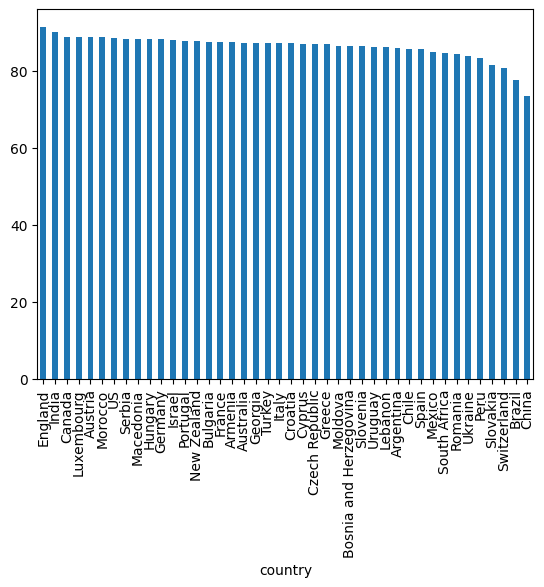

In [49]:
#Visual 1 - Bar plot of each countries average wine rating
import matplotlib.pyplot as plt
country_avg = wine_geo_df.groupby('country')['rating'].mean().sort_values(ascending=False)
country_avg.plot(kind='bar')


There are a lot of countries that don't have many ratings. I don't believe that a country with a small number of ratings gives a good average, so I will limit it to only countries that have at least 1000 ratings.

In [50]:
# Get a count of the number of wines that are rated for each country
country_count = wine_geo_df[wine_geo_df.duplicated('country')]['country'].value_counts()

# Filter the database to capture only countries with at least 1000 wine ratings
wine_geo_filtered = wine_geo_df[wine_geo_df['country'].isin(country_count.index[0:12])]

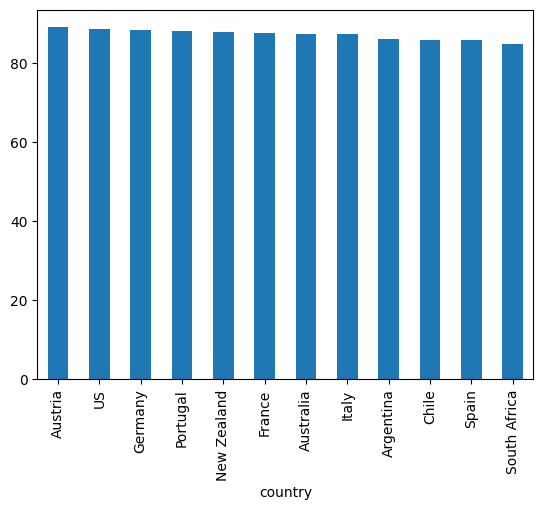

In [51]:
# Get the average rating for each country and plot
filtered_country_avg = wine_geo_filtered.groupby('country')['rating'].mean().sort_values(ascending=False)
filtered_country_avg.plot(kind='bar');

This data suggests that Austria is the country with the highest average wine rating, with US coming in second and Germany in third. I would be interested to see if I got the same results if I had more data. The bar chart helpes me clearly see which countryies have the highest average ratings. It also helps to see that there is not too much of a difference between the average ratings, so more data could possibly tip the scales. 

#### How does the price of wine affect ratings?

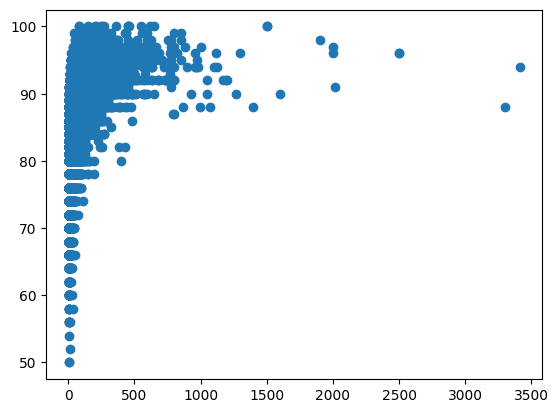

In [52]:
#Visual 2 - Scatter plot of price vs rating
x = wine_price_df['price']
y = wine_price_df['rating']

plt.scatter(x, y)

There are some big outliers here that are skewing the plot and are not representative of the overall data. I will filter this data to only have prices below $125, which is the 98th percentile of all the wines

In [53]:
np.percentile(wine_price_df['price'], 98)

125.0

In [54]:
wine_price_filtered = wine_price_df[wine_price_df['price'] <= 125]

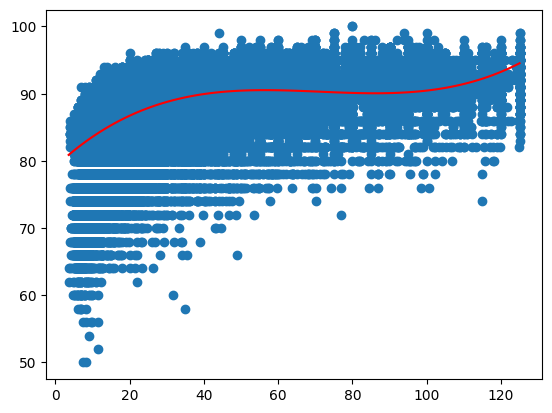

In [55]:
x = wine_price_filtered['price']
y = wine_price_filtered['rating']

# Fit a polynomial curve of degree 3 (quadratic) to the data
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the curve of best fit
x_curve = np.linspace(min(x), max(x), 100)

# Calculate corresponding y values for the curve of best fit
y_curve = polynomial(x_curve)

# Plot the original data points and the curve of best fit
plt.scatter(x, y, label='Data')
plt.plot(x_curve, y_curve, color='red')


After doing a 3 degree polynomial curve of the filtered data, I have gotten some answers to my questions. First, this data suggests that as price increases, ratings also tend to increase. It also suggests that at about 40 dollars is where you start to see diminishing returns on rating for the price. There is a noticable increase until that point, and then the curve levels off until about 100 dollars, even maybe dropping a little along the way. At about the 100 dollar mark is where we see the curve start to increase more dramatically again. This suggests that I can spend around 40 dollars and get similar quality wine as if I spent up to 100 dollars. Prices greater than about 100 dollars seem to be of higher quality. 

### **5.2:** Reflection

If I were to continue this project, I would want to dig deeper into the data and see exactly which regions and wineries have the highest wine ratings. I would also look more into the prices and get more exact about the best price to buy wine at for the best quality. Additionally, I would want to gather more data since I had to filter out a lot of countries due to the fact they did not have enough wines rated.

One issue that I can thing of is the nature of the ratings. Was it proffessional wine tasters or every day people rating the wine? It seems like the big_wine_df had professional wine tasters and the others were regular people since some had hundreds of ratings. 